In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
%matplotlib inline

In [2]:
ass = pd.read_csv("./cleaned data/AS.csv", low_memory=False, index_col=False)
mp = pd.read_csv("./cleaned data/MP.csv", low_memory=False, index_col=False)
up = pd.read_csv("./cleaned data/UP.csv", low_memory=False, index_col=False)
jh = pd.read_csv("./cleaned data/JH.csv", low_memory=False, index_col=False)
rj = pd.read_csv("./cleaned data/RJ.csv", low_memory=False, index_col=False)
bh = pd.read_csv("./cleaned data/BH.csv", low_memory=False, index_col=False)
cg = pd.read_csv("./cleaned data/CG.csv", low_memory=False, index_col=False)
od = pd.read_csv("./cleaned data/OD.csv", low_memory=False, index_col=False)
ut = pd.read_csv("./cleaned data/UT.csv", low_memory=False, index_col=False)

In [3]:
ut.shape

(3499, 16)

In [4]:
cg.shape

(6842, 16)

In [5]:
jh.shape

(8582, 16)

In [6]:
ass.shape

(7692, 16)

In [7]:
od.shape

(12910, 16)

In [8]:
rj.shape

(12107, 16)

In [9]:
mp.shape

(14661, 16)

In [10]:
bh.shape

(19760, 16)

In [11]:
up.shape

(34916, 16)

In [12]:
result = pd.concat([ut, cg, jh, ass, od, rj, mp, bh, up])

In [13]:
result.shape

(120969, 16)

In [ ]:
result.describe()

In [ ]:
for i in result.columns:
    print(i)
    print(result[i][result[i] == -1].value_counts())

In [ ]:
for i in result.columns.values:
    print(i)
    print(result['state_code'][result[i].isnull()].value_counts())
    print("-------------------------")

In [ ]:
result.shape

## Model Training

In [14]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix

In [15]:
x_train, x_test, y_train, y_test = train_test_split(result.drop('illness_type', axis=1), result['illness_type'], test_size=0.3, random_state=22)

In [ ]:
x_train.shape, y_train.shape

In [ ]:
x_test.shape, y_test.shape

In [ ]:
x_train['state_code'].value_counts()

In [16]:
svc = SVC()
l_svc = LinearSVC()
knc = KNeighborsClassifier(n_neighbors=49)
dtc = DecisionTreeClassifier(min_samples_split=300, random_state=200)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=231, random_state=200)

In [17]:
clfs = {'SVC' : svc, 'Linear SVC' : l_svc, 'KN' : knc, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [18]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)
    return clf

In [19]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [20]:
pred_scores = []
# for k,v in clfs.items():
#     clf = train_classifier(v, x_train, y_train)
#     pred = predict_labels(v,x_test)
#     pred_scores.append((k, [accuracy_score(y_test,pred)]))
#     print(k," - ",clf.score(x_test, y_test))
#     cm = confusion_matrix(y_test, pred)
#     print(cm)
#     sn.heatmap(cm, annot=True)
#     plt.show()
#     print("---------------------------------------\n\n")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
abc = AdaBoostClassifier(n_estimators=231, random_state=200)
bc = BaggingClassifier(n_estimators=231, random_state=200)
etc = ExtraTreesClassifier(n_estimators=231, random_state=200)

In [ ]:
clf = train_classifier(abc, x_train, y_train)
pred = predict_labels(abc,x_test)
pred_scores.append(('ABC', [accuracy_score(y_test,pred)]))
print(clf.score(x_test, y_test))
cm = confusion_matrix(y_test, pred)
print(cm)
sn.heatmap(cm, annot=True)

In [ ]:
clf = train_classifier(bc, x_train, y_train)
pred = predict_labels(bc,x_test)
pred_scores.append(('BC', [accuracy_score(y_test,pred)]))
print(clf.score(x_test, y_test))
cm = confusion_matrix(y_test, pred)
print(cm)
sn.heatmap(cm, annot=True)

In [ ]:
clf = train_classifier(etc, x_train, y_train)
pred = predict_labels(etc,x_test)
pred_scores.append(('ETC', [accuracy_score(y_test,pred)]))
print(clf.score(x_test, y_test))
cm = confusion_matrix(y_test, pred)
print(cm)
sn.heatmap(cm, annot=True)

0.743352346312
[[24968   272   582   187    17]
 [ 2192   327   165    77     3]
 [ 2924   171  1494    76     4]
 [ 1986    80    68   187     3]
 [  459    16    17    15     1]]


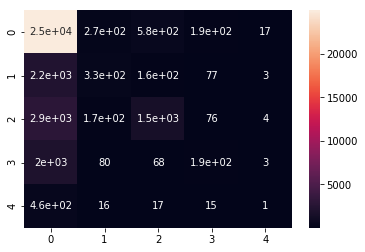

---------------------------------------




In [21]:
clf = train_classifier(rfc, x_train, y_train)
pred = predict_labels(rfc,x_test)
pred_scores.append(('RFC', [accuracy_score(y_test,pred)]))
print(clf.score(x_test, y_test))
cm = confusion_matrix(y_test, pred)
print(cm)
sn.heatmap(cm, annot=True)
plt.show()
print("---------------------------------------\n\n")

In [ ]:
clf = train_classifier(lrc, x_train, y_train)
pred = predict_labels(lrc,x_test)
pred_scores.append(('LRC', [accuracy_score(y_test,pred)]))
print(clf.score(x_test, y_test))
cm = confusion_matrix(y_test, pred)
print(cm)
sn.heatmap(cm, annot=True)

0.742939020694
[[25226   217   447   136     0]
 [ 2445   167   120    32     0]
 [ 3081    98  1443    46     1]
 [ 2107    54    37   125     1]
 [  473    11    13    10     1]]


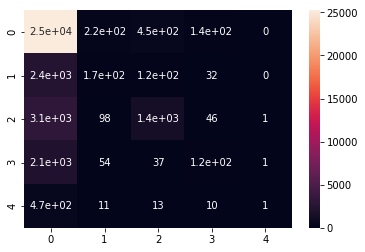

In [22]:
clf = train_classifier(dtc, x_train, y_train)
pred = predict_labels(dtc,x_test)
pred_scores.append(('DTC', [accuracy_score(y_test,pred)]))
print(clf.score(x_test, y_test))
cm = confusion_matrix(y_test, pred)
print(cm)
sn.heatmap(cm, annot=True)

0.739026204844
[[25402    93   486    45     0]
 [ 2533   132    79    20     0]
 [ 3362    61  1229    17     0]
 [ 2207    19    41    57     0]
 [  496     4     8     0     0]]


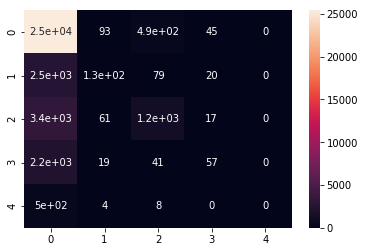

In [23]:
clf = train_classifier(knc, x_train, y_train)
pred = predict_labels(knc,x_test)
pred_scores.append(('KNC', [accuracy_score(y_test,pred)]))
print(clf.score(x_test, y_test))
cm = confusion_matrix(y_test, pred)
print(cm)
sn.heatmap(cm, annot=True)

In [ ]:
clf = train_classifier(lrc, x_train, y_train)
pred = predict_labels(lrc,x_test)
pred_scores.append(('LRC', [accuracy_score(y_test,pred)]))
print(clf.score(x_test, y_test))
cm = confusion_matrix(y_test, pred)
print(cm)
sn.heatmap(cm, annot=True)

In [24]:
scores = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
scores

,Score
RFC,0.743352
DTC,0.742939
KNC,0.739026


In [25]:
kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=None)

In [54]:
score = cross_val_score(rfc, result.drop('illness_type', axis=1), result['illness_type'], cv = kfold, scoring = "accuracy", n_jobs=-1)

In [56]:
score

array([ 0.74256444,  0.7457039 ,  0.74781028,  0.74351347,  0.74710744,
        0.74528926,  0.74557778,  0.7582672 ,  0.74636243,  0.74652778,
        0.74582438,  0.74929717,  0.75276997,  0.745659  ,  0.74731272,
        0.74780883,  0.74417066,  0.74764346,  0.74119398,  0.74069787])

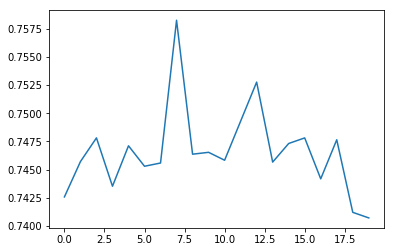

In [57]:
plt.plot(score)

In [58]:
score.mean()

0.74655510054778618

In [48]:
score = cross_val_score(knc, result.drop('illness_type', axis=1), result['illness_type'], cv = kfold, scoring = "accuracy", n_jobs=-1)

In [49]:
score

array([ 0.74196215,  0.74014381,  0.73946107,  0.73995702,  0.74324213,
        0.74373812,  0.73784722,  0.74212484,  0.74237288,  0.73914841])

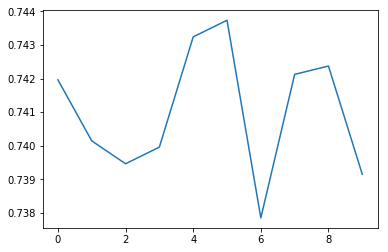

In [50]:
plt.plot(score)

In [59]:
score.mean()

0.74655510054778618

### Grid Search

In [16]:
from sklearn.model_selection import GridSearchCV

In [30]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [31]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [32]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(result.drop('illness_type', axis=1), result['illness_type'])
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 500}

In [34]:
rf = RandomForestClassifier(n_estimators = 500,max_depth= 6, max_features= 'log2', criterion= 'entropy',random_state=42,n_jobs=-1)

In [35]:
score = cross_val_score(rf, result.drop('illness_type', axis=1), result['illness_type'], cv = kfold, scoring = "accuracy", n_jobs=-1)

In [36]:
score

array([ 0.74405155,  0.74107733,  0.74549661,  0.74533135,  0.74429752,
        0.74347107,  0.74607373,  0.74140212,  0.74272487,  0.74222884,
        0.74516289,  0.74301306,  0.74483215,  0.74417066,  0.74665123,
        0.74632049,  0.74731272,  0.74417066,  0.74962791,  0.74598975])

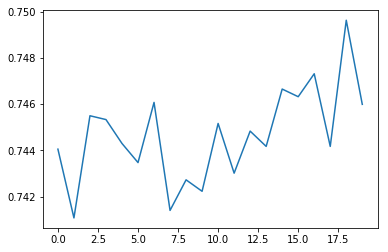

In [37]:
plt.plot(score)

In [38]:
score.mean()

0.74467032606803396